# **Introduccion al post-analisis de simulacion molecular por MDAnalysis con python**

# **Instalar bibliotecas de MDAnalysis y Parmed**

Instalar la biblioteca de MDAnalysis

In [ ]:
pip install MDAnalysis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.5 MB 3.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 376 kB 48.3 MB/s 
     |████████████████████████████████| 2.6 MB 34.7 MB/s 
     |████████████████████████████████| 2.1 MB 39.8 MB/s 
     |████████████████████████████████| 43 kB 1.8 MB/s 
  Created wheel for MDAnalysis: filename=MDAnalysis-2.1.0-cp37-cp37m-linux_x86_64.whl size=4649917 sha256=73fb3b7fa1164b4997c4f5cf0850a6d7aac5417ff67b43b87c86ea438f5c409a
  Stored in directory: /root/.cache/pip/wheels/fa/dd/6b/9d51e7216a401b71949467a123e3b2dffba11256346f7f7bda
Successfully built MDAnalysis


Instalar la biblioteca de Parmed

In [ ]:
pip install ParmEd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.6 MB 4.1 MB/s 
  Created wheel for ParmEd: filename=ParmEd-3.4.3-cp37-cp37m-linux_x86_64.whl size=807337 sha256=5d9f56413721f57b138e66d626563377d60f95d383bc0869b77d6cf2c949247c
  Stored in directory: /root/.cache/pip/wheels/2f/26/b3/8cb8da47601e3057598009e903ba5d71e3a8ff08bcbc65cd1e
Successfully built ParmEd


Instalar la biblioteca de nglview

In [ ]:
pip install nglview

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.7 MB 3.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.6 MB 42.1 MB/s 
  Created wheel for nglview: filename=nglview-3.0.3-py3-none-any.whl size=8057551 sha256=1324c9ae116498aa8dcd741e4df9a024f4a7a02d169fee8d5ee5ce49a842de43
  Stored in directory: /root/.cache/pip/wheels/01/0c/49/c6f79d8edba8fe89752bf20de2d99040bfa57db0548975c5d5
Successfully built nglview


# **Importar bibliotecas MDAnalysis y Parmed**

In [84]:
import parmed as pmd
import MDAnalysis as mda
from MDAnalysis.analysis import rms, align
from MDAnalysis.lib.distances import self_distance_array
import nglview as ngl

# Otras bibliotecas necesarias
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import numpy.linalg
import os

Support for third party widgets (widgets outside of the ipywidgets package) needs to be enabled separately. Support for these widgets will be loaded from a CDN external from Colab.

In [85]:
from google.colab import output
output.enable_custom_widget_manager()

# **Codigo**

Versiones de las bibliotecas

In [86]:
# Library versions
print ("\n > Library version\n")
print (" * Numpy      :", np.__version__ )
print (" * MDAnalysis :", mda.__version__ )
print (" * Parmed     :", pmd.__version__ )
print (" * nglview    :", ngl.__version__ )



 > Library version

 * Numpy      : 1.21.6
 * MDAnalysis : 2.1.0
 * Parmed     : 3.4.3
 * nglview    : 3.0.3


In [90]:
# load "3pqr" from RCSB PDB and display viewer widget
view = ngl.show_pdbid("3oun")  
view

NGLWidget()

In [95]:
# or shorter
#view.add_cartoon(selection="protein")
#view.add_surface(selection="protein", opacity=0.3)

# specify color
#view.add_cartoon(selection="protein", color='blue')

# specify residue
#view.add_licorice('ALA, GLU')

# clear representations
#view.clear_representations()

# update parameters for ALL cartoons of component 0 (default)
view.update_cartoon(opacity=0.4, component=0)

# remove ALL cartoons of component 0 (default)
#view.remove_cartoon(opacity=0.4, component=0)

Ejemplos MDAnalysis

In [96]:
# DCD frame inicial y final
start = 1
end   = 60
step  = 1
#
filePSF = 'complex.psf'
fileDCD = 'protein-ligando.dcd'
#
ligand_sel = 'resname LIG'
protein_sel = 'protein'
complex_sel = 'protein or resname LIG'

# always start with a Universe
u = mda.Universe(filePSF, fileDCD)
#
total_frames   = len(u.trajectory)
filter_frames  = u.trajectory[start:end:step]
frames         = [ts.frame for ts in filter_frames]
analyse_frames = len(frames)


print (" * Filename PSF : "+str(filePSF)+"")
print (" * Filename DCD : "+str(fileDCD)+"")
print ("\n")
print (" > Selection commands:\n")
print (" * Ligand  : "+str(ligand_sel) +"")
print (" * Protein : "+str(protein_sel)+"")
print (" * Complex : "+str(complex_sel)+"")
print ("\n")
print (" > Frames information of molecular dynamics simulations:\n")
print (" * Total frames      : "+str(total_frames)+"")
print (" * Frames to analyse : "+str(analyse_frames)+"")
print ("   \_Start             : "+str(frames[0])+"")
print ("   \_End               : "+str(frames[-1])+"")
print ("   \_Step              : "+str(step)+"")



 * Filename PSF : complex.psf
 * Filename DCD : protein-ligando.dcd


 > Selection commands:

 * Ligand  : resname LIG
 * Protein : protein
 * Complex : protein or resname LIG


 > Frames information of molecular dynamics simulations:

 * Total frames      : 699
 * Frames to analyse : 59
   \_Start             : 1
   \_End               : 59
   \_Step              : 1


In [ ]:
for ts in filter_frames:
  ##
  ## Ligand SASA
  print (ts)


In [99]:
# Writing of selected items in .dcd and .pdb format
ligandx = u.select_atoms(complex_sel)
ligand.write('ligand.dcd',   frames=frames)
ligand.write('ligand.pdb',   remarks='PDBWriter Ligand',  multiframe=None)
protein = u.select_atoms(protein_sel)
protein.write('protein.dcd', frames=frames)
protein.write('protein.pdb', remarks='PDBWriter Protein', multiframe=None)
complex = u.select_atoms(complex_sel)
complex.write('complex.dcd', frames=frames)
complex.write('complex.pdb', remarks='PDBWriter Complex', multiframe=None)
#
! ls -la

view=ngl.show_mdanalysis(ligandx)
view


/usr/local/lib/python3.7/dist-packages/MDAnalysis/coordinates/PDB.py:1080: UserWarning: Found no information for attr: 'altLocs' Using default value of ' '
  "".format(attrname, default))
/usr/local/lib/python3.7/dist-packages/MDAnalysis/coordinates/PDB.py:1080: UserWarning: Found no information for attr: 'icodes' Using default value of ' '
  "".format(attrname, default))
/usr/local/lib/python3.7/dist-packages/MDAnalysis/coordinates/PDB.py:1080: UserWarning: Found no information for attr: 'chainIDs' Using default value of ''
  "".format(attrname, default))
/usr/local/lib/python3.7/dist-packages/MDAnalysis/coordinates/PDB.py:1080: UserWarning: Found no information for attr: 'occupancies' Using default value of '1.0'
  "".format(attrname, default))
/usr/local/lib/python3.7/dist-packages/MDAnalysis/coordinates/PDB.py:1080: UserWarning: Found no information for attr: 'tempfactors' Using default value of '0.0'
  "".format(attrname, default))
/usr/local/lib/python3.7/dist-packages/MDAnalysis

total 84620
drwxr-xr-x 1 root root     4096 Oct 13 13:27 .
drwxr-xr-x 1 root root     4096 Oct 13 10:21 ..
-rw-r--r-- 1 root root  5649960 Oct 13 15:27 complex.dcd
-rw-r--r-- 1 root root   806376 Oct 13 15:27 complex.pdb
-rw-r--r-- 1 root root  1886869 Oct 13 10:29 complex.psf
-rw-r--r-- 1 root root  2425035 Oct 13 10:52 complex_tmp.psf
drwxr-xr-x 4 root root     4096 Oct  7 13:34 .config
drwxr-xr-x 2 root root     4096 Oct 13 10:52 .ipynb_checkpoints
-rw-r--r-- 1 root root    31980 Oct 13 15:27 ligand.dcd
-rw-r--r-- 1 root root     3980 Oct 13 15:27 ligand.pdb
-rw-r--r-- 1 root root    11647 Oct 13 10:52 ligand.psf
-rw-r--r-- 1 root root  5623056 Oct 13 15:27 protein.dcd
-rw-r--r-- 1 root root 66933720 Oct 13 10:35 protein-ligando.dcd
-rw-r--r-- 1 root root   802518 Oct 13 15:27 protein.pdb
-rw-r--r-- 1 root root  2413761 Oct 13 10:52 protein.psf
-rw-r--r-- 1 root root    22491 Oct 13 13:28 Rgyr.pdf
drwxr-xr-x 1 root root     4096 Oct  7 13:35 sample_data


NGLWidget(max_frame=698)

In [100]:
def Automatic_Box (filenamepdb):
    # Get Cartesian coordinates
    mol_coordsx = []
    mol_coordsy = []
    mol_coordsz = []
    complex_pdb    = mda.Universe(filenamepdb)
    complex_coords = complex_pdb.atoms.positions
    for line in complex_coords:
        coordx = line[0]
        coordy = line[1]
        coordz = line[2]
        #
        mol_coordsx.append(coordx)
        mol_coordsy.append(coordy)
        mol_coordsz.append(coordz)

    # Minimum value of the x,y,z-coordinates
    minx = min(mol_coordsx)
    miny = min(mol_coordsy)
    minz = min(mol_coordsz)
    # Minimum value of the x,y,z-coordinates
    maxx = max(mol_coordsx)
    maxy = max(mol_coordsy)
    maxz = max(mol_coordsz)
    # Simulation box size
    side_x = maxx - minx
    side_y = maxy - miny
    side_z = maxz - minz
    result = [side_x,side_y,side_z]
    #
    return result

# Measure box size
coords_box = Automatic_Box ('complex.pdb')
print ("\n")
print (" > Box size for MM/GBSA\n")
print (" * Side x :  %.2f   0.00   0.00" % coords_box[0] )
print (" * Side y :  0.00   %.2f   0.00" % coords_box[1] )
print (" * Side z :  0.00   0.00   %.2f" % coords_box[2] )
print ("\n")





 > Box size for MM/GBSA

 * Side x :  68.38   0.00   0.00
 * Side y :  0.00   56.82   0.00
 * Side z :  0.00   0.00   81.39




/usr/local/lib/python3.7/dist-packages/MDAnalysis/topology/PDBParser.py:317: UserWarning: Element information is missing, elements attribute will not be populated. If needed these can be guessed using MDAnalysis.topology.guessers.
  warnings.warn("Element information is missing, elements attribute "


[[ 11.073472    -1.6322749  -16.261003  ]
 [ 11.583257    -2.79213    -16.979275  ]
 [ 11.483445    -4.0413218  -16.425125  ]
 [ 11.105088    -4.2018347  -15.136287  ]
 [ 10.683475    -3.0676727  -14.454369  ]
 [ 10.52067     -1.7810912  -15.002615  ]
 [ 10.720225    -5.573779   -13.320563  ]
 [ 10.403524    -4.3877144  -12.509959  ]
 [ 10.426431    -3.1411345  -12.979882  ]
 [  7.8801336   -3.228599    -8.392881  ]
 [  6.6527004   -3.1307077   -7.8030415 ]
 [  6.491201    -2.5994918   -6.576896  ]
 [  7.552873    -2.3326852   -5.7010417 ]
 [  8.798068    -2.6073549   -6.19812   ]
 [  9.002771    -3.0102708   -7.569804  ]
 [ 11.415375    -5.367245   -14.541408  ]
 [ 10.710806    -6.657534   -12.753474  ]
 [  9.212202    -4.6232457  -11.719866  ]
 [  8.225614    -5.0786347  -12.255731  ]
 [  9.127193    -4.048713   -10.343608  ]
 [  7.9719214   -3.7949839   -9.736374  ]
 [  5.221291    -2.3946273   -6.2281766 ]
 [  5.2438917   -1.8991959   -5.3910594 ]
 [ 11.857386    -2.7702909  -18.37

/usr/local/lib/python3.7/dist-packages/MDAnalysis/core/groups.py:443: DeprecationWarning: The 'pbc' kwarg has been deprecated and will be removed in version 3.0., please use 'wrap' instead
  DeprecationWarning)


Frame:    62, Time:    3.031 ps
Rgyr: 4.65986 A


Frame:    63, Time:    3.080 ps
Rgyr: 4.60868 A


Frame:    64, Time:    3.129 ps
Rgyr: 8.39434 A


Frame:    65, Time:    3.178 ps
Rgyr: 4.80848 A


Frame:    66, Time:    3.227 ps
Rgyr: 6.14007 A


Frame:    67, Time:    3.276 ps
Rgyr: 16.9466 A


Frame:    68, Time:    3.324 ps
Rgyr: 6.31504 A


Frame:    69, Time:    3.373 ps
Rgyr: 4.70548 A


Frame:    70, Time:    3.422 ps
Rgyr: 4.67142 A


Frame:    71, Time:    3.471 ps
Rgyr: 4.65235 A


Frame:    72, Time:    3.520 ps
Rgyr: 4.6504 A


Frame:    73, Time:    3.569 ps
Rgyr: 4.63793 A


Frame:    74, Time:    3.618 ps
Rgyr: 4.72058 A


Frame:    75, Time:    3.667 ps
Rgyr: 8.44996 A


Frame:    76, Time:    3.716 ps
Rgyr: 6.09597 A


Frame:    77, Time:    3.764 ps
Rgyr: 6.15304 A


Frame:    78, Time:    3.813 ps
Rgyr: 4.62144 A


Frame:    79, Time:    3.862 ps
Rgyr: 8.4413 A


Frame:    80, Time:    3.911 ps
Rgyr: 16.5563 A


Frame:    81, Time:    3.960 ps
Rgyr: 7.4308 A


Fra

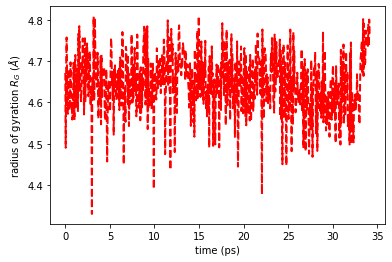

In [101]:
# Select atoms
#ag = u.select_atoms('name OH')
ag = u.select_atoms(ligand_sel)

# Atom data made available as Numpy arrays
#ag.positions
print (ag.positions)

Rgyr = []

# Iterate through trajectories
for ts in u.trajectory:
  print("Frame: {0:5d}, Time: {1:8.3f} ps".format(ts.frame, u.trajectory.time))
  print("Rgyr: {0:g} A".format(ag.radius_of_gyration(pbc=True)))
  Rgyr.append((u.trajectory.time, ag.radius_of_gyration()))
 # print("" + str(ag.center_of_mass())+ "")
    #print("" + str(ag.positions)+ "")
  print ("\n")
Rgyr = np.array(Rgyr)



ax = plt.subplot(111)
ax.plot(Rgyr[:,0], Rgyr[:,1], 'r--', lw=2, label=r"$R_G$")
ax.set_xlabel("time (ps)")
ax.set_ylabel(r"radius of gyration $R_G$ ($\AA$)")
ax.figure.savefig("Rgyr.pdf")
plt.draw()


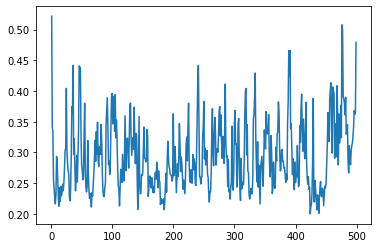

In [102]:
ca = u.select_atoms("name CA") 
means = np.zeros((len(ca), 3)) 
sumsq = np.zeros_like(means) 
for k, ts in enumerate(u.trajectory):    
    sumsq += (k/(k+1.0)) * (ca.positions - means)**2    
    means[:] = (k*means + ca.positions)/(k+1.0) 
rmsf = np.sqrt(sumsq.sum(axis=1)/(k+1.0)) 
plt.plot(ca.residues.resids, rmsf)


Generating PSF file

In [ ]:
# make a ParmEd object 
pLig  = ligand.convert_to('PARMED')
pLig.save("ligand.psf")
pProt = protein.convert_to('PARMED')
pProt.save("protein.psf")
pComp = complex.convert_to('PARMED')
pComp.save("complex_tmp.psf")
#

Ver ejemplo ligand.psf

In [ ]:
!cat ligand.psf